In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.01
training_epochs = 500

Defining the sigmoid function:

In [3]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

Create out data points on the x and y axis

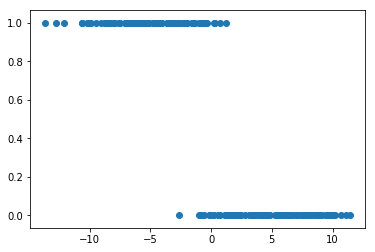

In [4]:
x1 = np.random.normal(5,3,100)
x2 = np.random.normal(-5, 3, 100)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))
plt.scatter(xs, ys)

Create our parameters and placeholders for X and Y to feed them with the data above:

In [5]:
X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0.], name="parameter", trainable=True)
y_model = tf.sigmoid(-(w[1] * X + w[0]))

Calculate the cost and adaptation (learning):

In [6]:
cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1 - Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Run the model:

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys}) # err = cost
        print(epoch, err)
        if abs(prev_err - err) < 0.0001: # adjust to see curve change with epochs
            break # Check when the error is small enough to quit
        prev_err = err
    w_val = sess.run(w, {X: xs, Y: ys})

0 0.693147
1 0.632202
2 0.581404
3 0.538872
4 0.50302
5 0.472553
6 0.446441
7 0.42387
8 0.4042
9 0.386925
10 0.371644
11 0.358037
12 0.345845
13 0.33486
14 0.324911
15 0.315857
16 0.307582
17 0.299988
18 0.292993
19 0.286528
20 0.280534
21 0.274959
22 0.26976
23 0.2649
24 0.260345
25 0.256067
26 0.25204
27 0.248243
28 0.244655
29 0.241259
30 0.238039
31 0.234983
32 0.232076
33 0.229308
34 0.226669
35 0.224149
36 0.221741
37 0.219437
38 0.21723
39 0.215114
40 0.213082
41 0.211131
42 0.209254
43 0.207448
44 0.205708
45 0.204031
46 0.202413
47 0.200852
48 0.199343
49 0.197884
50 0.196473
51 0.195108
52 0.193785
53 0.192503
54 0.19126
55 0.190055
56 0.188884
57 0.187748
58 0.186643
59 0.18557
60 0.184526
61 0.18351
62 0.182522
63 0.181559
64 0.180621
65 0.179708
66 0.178817
67 0.177948
68 0.1771
69 0.176273
70 0.175465
71 0.174676
72 0.173906
73 0.173153
74 0.172417
75 0.171697
76 0.170993
77 0.170305
78 0.169631
79 0.168971
80 0.168325
81 0.167693
82 0.167073
83 0.166466
84 0.165871
85 0.

Plot the resulting sigmoid:

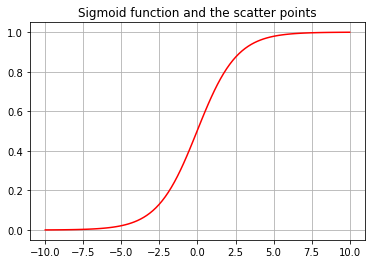

In [8]:
all_xs = np.linspace(-10, 10, 100)
plt.plot(all_xs, sigmoid(all_xs * w_val[1] + w_val[0]), 'r') # calculate the sigmoid
plt.grid(), plt.title("Sigmoid function and the scatter points")
plt.pause(1)